<script>
    function findAncestor (el, name) {
        while ((el = el.parentElement) && el.nodeName.toLowerCase() !== name);
        return el;
    }
    function colorAll(el, textColor) {
        el.style.color = textColor;
        Array.from(el.children).forEach((e) => {colorAll(e, textColor);});
    }
    function setBackgroundImage(src, textColor) {
        var section = findAncestor(document.currentScript, 'section');
        if (section) {
            section.setAttribute('data-background-image', src);
			if (textColor) colorAll(section, textColor);
        }
    }
</script>

<style>
h1 {
  border: 1.5px solid #333;
  padding: 8px 12px;
  background-image: linear-gradient(#2774AE,#ebf8e1, #FFD100);
  position: static;
}
</style>

<h1 style='color:white'> Statistics 21 <br/> Python & Other Technologies for Data Science </h1>

<h3 style='color:white'>Vivian Lew, PhD - Wednesday, Week 5</h3>

<script>
    setBackgroundImage('Window1.jpg');
</script>

# Pandas Multiple DataFrames

## Week 6 Monday

## Adapted from Pandas in Action by B.Pashkaver and Python for Data Analysis by W. McKinney

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import warnings
from openpyxl import Workbook

warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl.worksheet.header_footer')

In [2]:
## Reading Excel

HC20 = pd.read_excel('2020-homeless-count-data-by-census-tract.xlsx', 
                     sheet_name=3)
HC22 = pd.read_excel('2022-homeless-count-data-by-census-tract.xlsx', 
                     sheet_name=2)

In [3]:
HC20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3737 entries, 0 to 3736
Data columns (total 73 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tract_split           3737 non-null   object 
 1   Year                  3737 non-null   int64  
 2   City                  3737 non-null   object 
 3   LACity                3737 non-null   int64  
 4   Community_Name        3737 non-null   object 
 5   SPA                   3737 non-null   int64  
 6   SD                    3737 non-null   int64  
 7   CD                    3737 non-null   int64  
 8   ca_ssd                3737 non-null   int64  
 9   ca_sad                3737 non-null   int64  
 10  us_cd                 3737 non-null   int64  
 11  DemogSurvCt           3737 non-null   int64  
 12  SheltHmisCt           3737 non-null   int64  
 13  ShelterCountAny       3737 non-null   int64  
 14  StreetCountAny        3737 non-null   int64  
 15  totStreetSingAdult   

In [4]:
HC22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732 entries, 0 to 3731
Data columns (total 74 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tract_split           3732 non-null   object 
 1   Year                  3732 non-null   int64  
 2   City                  3732 non-null   object 
 3   LACity                3732 non-null   int64  
 4   Community_Name        3732 non-null   object 
 5   SPA                   3732 non-null   int64  
 6   SD                    3732 non-null   int64  
 7   CD                    3732 non-null   int64  
 8   ca_ssd                3732 non-null   int64  
 9   ca_sad                3732 non-null   int64  
 10  us_cd                 3732 non-null   int64  
 11  DemogSurvCt           3732 non-null   int64  
 12  SheltHmisCt           3732 non-null   int64  
 13  DemogSurveyAny        3732 non-null   int64  
 14  ShelterCountAny       3732 non-null   int64  
 15  StreetCountAny       

## Saving space

- convert float to integer
- object to bool, float, int, date
- remove uninformative columns

In [5]:
cols_to_drop = HC20.columns[5:71]
HC20d = HC20.drop(columns=cols_to_drop)
cols_to_drop = HC22.columns[5:72]
HC22d = HC22.drop(columns=cols_to_drop)

In [6]:
HC20d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3737 entries, 0 to 3736
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tract_split     3737 non-null   object 
 1   Year            3737 non-null   int64  
 2   City            3737 non-null   object 
 3   LACity          3737 non-null   int64  
 4   Community_Name  3737 non-null   object 
 5   totSheltPeople  3737 non-null   int64  
 6   totPeople       3737 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 204.5+ KB


In [7]:
HC20d

,tract_split,Year,City,LACity,Community_Name,totSheltPeople,totPeople
0,101110,2020,Los Angeles,1,Tujunga,0,1.000
1,101122a,2020,Los Angeles,1,Tujunga,0,0.000
2,101122b,2020,Los Angeles,1,Tujunga,0,5.312
3,101210,2020,Los Angeles,1,Tujunga,0,22.415
4,101220,2020,Los Angeles,1,Tujunga,0,15.912
...,...,...,...,...,...,...,...
3732,980031b,2020,Los Angeles,1,San Pedro,0,0.000
3733,980031c,2020,Los Angeles,1,San Pedro,0,0.000
3734,980031d,2020,Los Angeles,1,San Pedro,0,0.000
3735,980031e,2020,Los Angeles,1,San Pedro,0,40.800


In [8]:
HC22d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3732 entries, 0 to 3731
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tract_split     3732 non-null   object 
 1   Year            3732 non-null   int64  
 2   City            3732 non-null   object 
 3   LACity          3732 non-null   int64  
 4   Community_Name  3732 non-null   object 
 5   totSheltPeople  3732 non-null   int64  
 6   totPeople       3732 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 204.2+ KB


In [9]:
HC22d

,tract_split,Year,City,LACity,Community_Name,totSheltPeople,totPeople
0,101110,2022,Los Angeles,1,Tujunga,0,4.436
1,101122a,2022,Los Angeles,1,Tujunga,0,5.930
2,101122b,2022,Los Angeles,1,Tujunga,0,1.490
3,101210,2022,Los Angeles,1,Tujunga,0,9.436
4,101220,2022,Los Angeles,1,Tujunga,0,0.000
...,...,...,...,...,...,...,...
3727,980031b,2022,Los Angeles,1,San Pedro,0,19.671
3728,980031c,2022,Los Angeles,1,San Pedro,0,0.000
3729,980031d,2022,Los Angeles,1,San Pedro,0,0.000
3730,980031e,2022,Los Angeles,1,San Pedro,0,4.737


In [10]:
# Group by Community_Name, sum the totPeople and preserve the City value
result2020 = HC20d.groupby(['Community_Name',
                            'City']).agg({'totSheltPeople': 'sum',
                                          'totPeople': 'sum'}).reset_index()

In [11]:
# Round the sum of totPeople
result2020 = result2020.round({'totSheltPeople': 0, 'totPeople': 0})

In [12]:
#pd.set_option('display.max_rows', None)
result2020

,Community_Name,City,totSheltPeople,totPeople
0,Acton,Unincorporated,0,80.0
1,Adams-Normandie,Los Angeles,12,59.0
2,Agoura Hills,Agoura Hills,0,2.0
3,Agua Dulce,Unincorporated,0,9.0
4,Alhambra,Alhambra,14,46.0
...,...,...,...,...
306,Wilmington,Los Angeles,35,585.0
307,Windsor Square,Los Angeles,0,19.0
308,Winnetka,Los Angeles,0,77.0
309,Wiseburn,Unincorporated,0,1.0


## isin for more complicated extraction

- What if we want to examine smaller areas? 
- We could program three Booleans inside the square brackets and add the | symbol to declare OR criteria

```
WW = result2020['Community_Name'] == 'Westwood'
WLA = result2020['Community_Name'] == 'West Los Angeles'
SM = result2020['Community_Name'] == 'Santa Monica'
BW = result2020['Community_Name'] == 'Brentwood'
BA = result2020['Community_Name'] == 'Bel-Air'

result2020[WW | WLA | SM | BW | BA].head()
```
- This will work 
- But becomes awkward as the conditions grow.

## isin example

In [13]:
west = ['Westwood', 'West Los Angeles', 'Santa Monica', 
        'Brentwood', 'Bel-Air']
result2020[result2020['Community_Name'].isin(west)]

,Community_Name,City,totSheltPeople,totPeople
22,Bel-Air,Los Angeles,0,6.0
31,Brentwood,Los Angeles,0,65.0
214,Santa Monica,Santa Monica,169,811.0
292,West Los Angeles,Los Angeles,21,617.0
301,Westwood,Los Angeles,0,184.0


## filtering using an interval

In [14]:
highest20 = result2020['totSheltPeople'].between(
             left = 100,
             right = 201) # includes lower excludes upper
result2020[highest20].sort_values('totSheltPeople') 

,Community_Name,City,totSheltPeople,totPeople
156,Mid-City,Los Angeles,101,326.0
228,South Park,Los Angeles,117,413.0
279,Vermont-Slauson,Los Angeles,120,260.0
285,Watts,Los Angeles,123,309.0
83,Florence,Los Angeles,126,556.0
71,Echo Park,Los Angeles,140,590.0
173,Pacoima,Los Angeles,141,477.0
214,Santa Monica,Santa Monica,169,811.0
29,Boyle Heights,Los Angeles,184,935.0


## filtering on a string

In [15]:
result2020[result2020['Community_Name'].str.contains('Beach', 
                                                     regex=False, 
                                                     na = False)]

,Community_Name,City,totSheltPeople,totPeople
104,Hermosa Beach,Hermosa Beach,0,28.0
152,Manhattan Beach,Manhattan Beach,0,15.0
190,Redondo Beach,Redondo Beach,0,176.0
259,Unincorporated Long Beach,Unincorporated,0,0.0


## Pivot Table

- A pivot table aggregates a column’s values 
- It groups the results using a different columns’ values.
- To aggregate includes mean, sum, median, and count. 
- A pivot table in pandas is similar to those in Microsoft Excel.

## Pivot Table steps

- pick the column(s) we want to aggregate.
- pick the aggregation method to apply to the column(s).
- pick the column(s) that will group the aggregated data into categories.
- decide where to place the groups:b on the row axis, the column axis, or both axes.

## Example

- let's look at some of the characteristics of hate crimes
- The pivot_table index parameter identifies the column that serves as the pivot table’s index labels. 
- Pandas uses the unique values from that column to group the results.
- mean is the default

In [16]:
h01_21 = pd.read_csv('Hate-2001-2021.csv')
h01_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26199 entries, 0 to 26198
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   RecordId                                26199 non-null  object 
 1   ClosedYear                              26199 non-null  int64  
 2   MonthOccurrence                         26199 non-null  int64  
 3   County                                  26199 non-null  int64  
 4   NCIC                                    26199 non-null  object 
 5   TotalNumberOfVictims                    26199 non-null  int64  
 6   TotalNumberOfIndividualVictims          26199 non-null  int64  
 7   SuspectsRaceAsAGroup                    26199 non-null  object 
 8   TotalNumberOfSuspects                   26199 non-null  int64  
 9   MostSeriousUcr                          26199 non-null  object 
 10  MostSeriousUcrType                      26199 non-null  ob

In [17]:
h01_21.pivot_table(index = ['SuspectsEthnicityAsAGroup', 
                            'SuspectsRaceAsAGroup'], 
                   values = ['TotalNumberOfIndividualVictimsAdult',
                             'TotalNumberOfSuspectsAdult'])

TotalNumberOfIndividualVictimsAdult   
SuspectsEthnicityAsAGroup     SuspectsRaceAsAGroup                                                             
Group of Multiple Ethnicities American Indian or Alaska Native                                      1.000000  \
                              Asian                                                                 0.857143   
                              Black or African American                                             0.944444   
                              Group of Multiple Races                                               1.204545   
                              Native Hawaiian or Other Pacific Islander                             1.000000   
                              Unknown                                                               1.000000   
                              White                                                                 1.210526   
Hispanic or Latino            American Indian or Alaska Native                                      1.000000   
                              Asian                                                                 1.000000   
                              Black or African American                                             0.833333   
                              Group of Multiple Races                                               1.029333   
                              Native Hawaiian or Other Pacific Islander                             1.000000   
                              Unknown                                                               1.031891   
                              White                                                                 0.992481   
Not Hispanic or Latino        American Indian or Alaska Native                                      0.500000   
                              Asian                                                                 0.977273   
                              Black or African American                                             1.180723   
                              Group of Multiple Races                                               1.200000   
                              Native Hawaiian or Other Pacific Islander                             0.900000   
                              Unknown                                                               1.181818   
                              White                                                                 1.051339   
Unknown                       American Indian or Alaska Native                                      1.000000   
                              Asian                                                                 1.083333   
                              Black or African American                                             1.149254   
                              Group of Multiple Races                                               1.250000   
                              Native Hawaiian or Other Pacific Islander                             1.333333   
                              Unknown                                                               0.708545   
                              White                                                                 1.072398   

                                                                         TotalNumberOfSuspectsAdult  
SuspectsEthnicityAsAGroup     SuspectsRaceAsAGroup                                                   
Group of Multiple Ethnicities American Indian or Alaska Native                             1.000000  
                              Asian                                                        1.000000  
                              Black or African American                                    1.444444  
                              Group of Multiple Races                                      2.238636  
                              Native Hawaiian or Other Pacific Islander                    1.000000 

Referring to the previous slide

- A DataFrame object is returned. This is a pivot table.
- The table shows average victim and suspect age organized by the ethnicity-race of the suspect.



## More on the pivot_table

- the aggfunc can take a dictionary so multiple values and functions can be used

In [18]:
h01_21.pivot_table(index = ['SuspectsEthnicityAsAGroup', 
                            'SuspectsRaceAsAGroup'], 
                   values = ['TotalNumberOfIndividualVictimsAdult', 
                             'TotalNumberOfSuspectsAdult'],
                   aggfunc = {'SuspectsRaceAsAGroup': 'count',
                            'TotalNumberOfSuspectsAdult': [min, 
                                                           np.median, 
                                                           max]})

SuspectsRaceAsAGroup   
                                                                                       count   
SuspectsEthnicityAsAGroup     SuspectsRaceAsAGroup                                             
Group of Multiple Ethnicities American Indian or Alaska Native                             1  \
                              Asian                                                        7   
                              Black or African American                                   18   
                              Group of Multiple Races                                     88   
                              Native Hawaiian or Other Pacific Islander                    2   
                              Unknown                                                      4   
                              White                                                       19   
Hispanic or Latino            American Indian or Alaska Native                             6   
                              Asian                                                        1   
                              Black or African American                                    6   
                              Group of Multiple Races                                    375   
                              Native Hawaiian or Other Pacific Islander                    1   
                              Unknown                                                    439   
                              White                                                      532   
Not Hispanic or Latino        American Indian or Alaska Native                             2   
                              Asian                                                       44   
                              Black or African American                                  498   
                              Group of Multiple Races                                     15   
                              Native Hawaiian or Other Pacific Islander                   10   
                              Unknown                                                     22   
                              White                                                      896   
Unknown                       American Indian or Alaska Native                             4   
                              Asian                                                       12   
                              Black or African American                                  268   
                              Group of Multiple Races                                      4   
                              Native Hawaiian or Other Pacific Islander                    3   
                              Unknown                                                   2563   
                              White                                                      442   

                                                                        TotalNumberOfSuspectsAdult   
                                                                                               max   
SuspectsEthnicityAsAGroup     SuspectsRaceAsAGroup                                                   
Group of Multiple Ethnicities American Indian or Alaska Native                                 1.0  \
                              Asian                                                            1.0   
                              Black or African American                                        4.0   
                              Group of Multiple Races                                         13.0   
                              Native Hawaiian or Other Pacific Islander                        1.0   
                              Unknown                                                          3.0   
                              White                                                            4.0   
Hispanic or Latino            American Indian or Alaska Native             

## still more

- We can control the columns as well
- This would create many NaNs so we could use 0 as a fill value

In [19]:
h01_21.pivot_table(index = ['SuspectsEthnicityAsAGroup', 
                            'SuspectsRaceAsAGroup'], 
                 columns = 'MostSeriousVictimType', 
                 values = 'TotalNumberOfSuspectsAdult', 
                 aggfunc = ['count', np.median, max],
                 fill_value = 0)

count   
MostSeriousVictimType                                                   Business   
SuspectsEthnicityAsAGroup     SuspectsRaceAsAGroup                                 
Group of Multiple Ethnicities American Indian or Alaska Native                 0  \
                              Asian                                            0   
                              Black or African American                        2   
                              Group of Multiple Races                          1   
                              Native Hawaiian or Other Pacific Islander        0   
                              Unknown                                          0   
                              White                                            0   
Hispanic or Latino            American Indian or Alaska Native                 0   
                              Asian                                            0   
                              Black or African American                        0   
                              Group of Multiple Races                          5   
                              Native Hawaiian or Other Pacific Islander        0   
                              Unknown                                          4   
                              White                                           33   
Not Hispanic or Latino        American Indian or Alaska Native                 0   
                              Asian                                            0   
                              Black or African American                        1   
                              Group of Multiple Races                          0   
                              Native Hawaiian or Other Pacific Islander        0   
                              Unknown                                          0   
                              White                                           17   
Unknown                       American Indian or Alaska Native                 0   
                              Asian                                            0   
                              Black or African American                        1   
                              Group of Multiple Races                          0   
                              Native Hawaiian or Other Pacific Islander        0   
                              Unknown                                        305   
                              White                                            8   

                                                                                    
MostSeriousVictimType                                                   Financial   
SuspectsEthnicityAsAGroup     SuspectsRaceAsAGroup                                  
Group of Multiple Ethnicities American Indian or Alaska Native                  0  \
                              Asian                                             0   
                              Black or African American                         0   
                              Group of Multiple Races                           0   
                              Native Hawaiian or Other Pacific Islander         0   
                              Unknown                                           0   
                              White                                             0   
Hispanic or Latino            American Indian or Alaska Native                  0   
                              Asian                                             0   
                              Black or African American                         0   
                              Group of Multiple Races                           0   
                              Native Hawaiian or Other Pacific Islander         0   
                              Unknown                                           0   
                              White                                             0   
Not Hispanic or Latino   

## stack to multi index

- In this simple example, the stack method for dataframes allow us to create a multi-index.
- in a more complex real-world example, stacking the hate crime dataframe might result in a multi index based on suspect characteristics and then dates when the event occurred.

In [20]:
suspect_date = h01_21.pivot_table(
             index = ['SuspectsEthnicityAsAGroup', 
                      'SuspectsRaceAsAGroup'],
             columns = 'ClosedYear',
             values = 'TotalNumberOfSuspectsAdult',
             aggfunc = 'count')
suspect_date

ClosedYear                                                                2015   
SuspectsEthnicityAsAGroup     SuspectsRaceAsAGroup                               
Group of Multiple Ethnicities American Indian or Alaska Native             NaN  \
                              Asian                                        1.0   
                              Black or African American                    NaN   
                              Group of Multiple Races                      8.0   
                              Native Hawaiian or Other Pacific Islander    1.0   
                              Unknown                                      1.0   
                              White                                        NaN   
Hispanic or Latino            American Indian or Alaska Native             NaN   
                              Asian                                        NaN   
                              Black or African American                    NaN   
                              Group of Multiple Races                     59.0   
                              Native Hawaiian or Other Pacific Islander    NaN   
                              Unknown                                     18.0   
                              White                                        7.0   
Not Hispanic or Latino        American Indian or Alaska Native             NaN   
                              Asian                                        1.0   
                              Black or African American                   14.0   
                              Group of Multiple Races                      2.0   
                              Native Hawaiian or Other Pacific Islander    NaN   
                              Unknown                                      1.0   
                              White                                       29.0   
Unknown                       American Indian or Alaska Native             NaN   
                              Asian                                        NaN   
                              Black or African American                    4.0   
                              Group of Multiple Races                      2.0   
                              Native Hawaiian or Other Pacific Islander    NaN   
                              Unknown                                    196.0   
                              White                                        7.0   

ClosedYear                                                                2016   
SuspectsEthnicityAsAGroup     SuspectsRaceAsAGroup                               
Group of Multiple Ethnicities American Indian or Alaska Native             NaN  \
                              Asian                                        NaN   
                              Black or African American                    NaN   
                              Group of Multiple Races                     17.0   
                              Native Hawaiian or Other Pacific Islander    1.0   
                              Unknown                                      NaN   
                              White                                        2.0   
Hispanic or Latino            American Indian or Alaska Native             NaN   
                              Asian                                        NaN   
                              Black or African American                    1.0   
                              Group of Multiple Races                     63.0   
                              Native Hawaiian or Other Pacific Islander    NaN   
                              Unknown                                     48.0   
                              White                                       41.0   
Not Hispanic or Latino        American Indian or Alaska Native             NaN   
                              Asian                                        7.0   
                              Black or African American        

## stack and multindex

- so this pivot table is not too large (28 x 7) but we can stack it
- Pandas creates a MultiIndex for the row and column information. 
- since a single column of values remains, pandas returns a Series
- notice no NaN

In [21]:
suspect_date.stack()

SuspectsEthnicityAsAGroup      SuspectsRaceAsAGroup              ClosedYear
Group of Multiple Ethnicities  American Indian or Alaska Native  2019            1.0
                               Asian                             2015            1.0
                                                                 2018            2.0
                                                                 2020            3.0
                                                                 2021            1.0
                                                                               ...  
Unknown                        White                             2017           39.0
                                                                 2018           52.0
                                                                 2019           66.0
                                                                 2020          100.0
                                                                 2021     

## slicing a multi-index

- this is a simple example using IndexSlice which is a little clearer

In [22]:
suspect_date2 = suspect_date.stack()
suspect_date2.loc[pd.IndexSlice[:, :, [2019, 2021]]]

SuspectsEthnicityAsAGroup      SuspectsRaceAsAGroup                       ClosedYear
Group of Multiple Ethnicities  American Indian or Alaska Native           2019            1.0
                               Asian                                      2021            1.0
                               Black or African American                  2019            2.0
                                                                          2021            6.0
                               Group of Multiple Races                    2019           10.0
                                                                          2021           18.0
                               Unknown                                    2021            2.0
                               White                                      2019            1.0
                                                                          2021            7.0
Hispanic or Latino             American Indian or Alaska Native      

## sorting the result

In [23]:
suspect_date2.loc[pd.IndexSlice[:, :, [2019, 2021]]].sort_values(ascending = False)

SuspectsEthnicityAsAGroup      SuspectsRaceAsAGroup                       ClosedYear
Unknown                        Unknown                                    2021          476.0
                                                                          2019          342.0
Not Hispanic or Latino         White                                      2021          221.0
Hispanic or Latino             White                                      2021          197.0
Unknown                        White                                      2021          144.0
Not Hispanic or Latino         White                                      2019          130.0
                               Black or African American                  2021          109.0
Hispanic or Latino             Unknown                                    2021          108.0
Unknown                        Black or African American                  2021          102.0
                               White                                 

# Multiple DataFrames

- concatenate and joining
- concatenate is the easier of the two, like a rbind() in R

In [24]:
fortuneA = pd.read_csv('fortuneA.csv')
fortuneB = pd.read_csv('fortuneB.csv')

In [25]:
fortuneA

,Company,Revenues,Profits,Employees,Sector,Industry
0,Walmart,500343.0,9862.0,2300000,Retailing,General Merchandisers
1,Exxon Mobil,244363.0,19710.0,71200,Energy,Petroleum Refining
2,Berkshire Hathaway,242137.0,44940.0,377000,Financials,Insurance: Property and Casualty (Stock)
3,Apple,229234.0,48351.0,123000,Technology,"Computers, Office Equipment"
4,UnitedHealth Group,201159.0,10558.0,260000,Health Care,Health Care: Insurance and Managed Care
...,...,...,...,...,...,...
495,Polaris Industries,5505.0,172.5,11000,Transportation,Transportation Equipment
496,Pioneer Natural Resources,5455.0,833.0,3836,Energy,"Mining, Crude-Oil Production"
497,ABM Industries,5454.0,3.8,140000,Business Services,Diversified Outsourcing Services
498,Vistra Energy,5430.0,-254.0,4150,Energy,Energy


In [26]:
fortuneB

,Company,Revenues,Profits,Employees,Sector,Industry
0,Hess,5405.0,-4074.0,2075,Energy,"Mining, Crude-Oil Production"
1,Host Hotels & Resorts,5387.0,564.0,205,Financials,Real estate
2,Kelly Services,5374.0,71.6,7800,Business Services,Temporary Help
3,Genesis Healthcare,5374.0,-579.0,68700,Health Care,Health Care: Medical Facilities
4,Michaels Cos.,5362.0,390.5,30500,Retailing,Specialty Retailers: Other
...,...,...,...,...,...,...
495,SiteOne Landscape Supply,1862.0,54.6,3664,Wholesalers,Wholesalers: Diversified
496,Charles River Laboratories Intl,1858.0,123.4,11800,Health Care,Health Care: Pharmacy and Other Services
497,CoreLogic,1851.0,152.2,5900,Business Services,Financial Data Services
498,Ensign Group,1849.0,40.5,21301,Health Care,Health Care: Medical Facilities


## Concatenate

- Combine the rows of multiple DataFrames into a single DataFrame. 
- Pandas concat function
- Pass its objs parameter a list of DataFrames. 
- Pandas concatenates the objects in the order in which they appear in the objs list.

In [27]:
fortune1000 = pd.concat(objs = [fortuneA, fortuneB])
fortune1000.shape

(1000, 6)

## More Concatenate

- What if we want to preserve which DataFrame each row of data came from? 
- We can add a keys parameter and pass it a list of strings. 
- Pandas associates each string in the keys list with the DataFrame at the same index position in the objs list. 
- The keys and objs lists must be of equal length.

In [28]:
pd.concat(objs = [fortuneB, fortuneA], keys = ['FB', 'FA'])

Company  Revenues  Profits  Employees   
FB 0                         Hess    5405.0  -4074.0       2075  \
   1        Host Hotels & Resorts    5387.0    564.0        205   
   2               Kelly Services    5374.0     71.6       7800   
   3           Genesis Healthcare    5374.0   -579.0      68700   
   4                Michaels Cos.    5362.0    390.5      30500   
...                           ...       ...      ...        ...   
FA 495         Polaris Industries    5505.0    172.5      11000   
   496  Pioneer Natural Resources    5455.0    833.0       3836   
   497             ABM Industries    5454.0      3.8     140000   
   498              Vistra Energy    5430.0   -254.0       4150   
   499                     Cintas    5429.0    480.7      42000   

                   Sector                          Industry  
FB 0               Energy      Mining, Crude-Oil Production  
   1           Financials                       Real estate  
   2    Business Services                    Temporary Help  
   3          Health Care   Health Care: Medical Facilities  
   4            Retailing        Specialty Retailers: Other  
...                   ...                               ...  
FA 495     Transportation          Transportation Equipment  
   496             Energy      Mining, Crude-Oil Production  
   497  Business Services  Diversified Outsourcing Services  
   498             Energy                            Energy  
   499  Business Services  Diversified Outsourcing Services  

[1000 rows x 6 columns]

## Inner Join

- An inner join connects values that exist across two DataFrames. 
- It's thought of as the intersection between the two

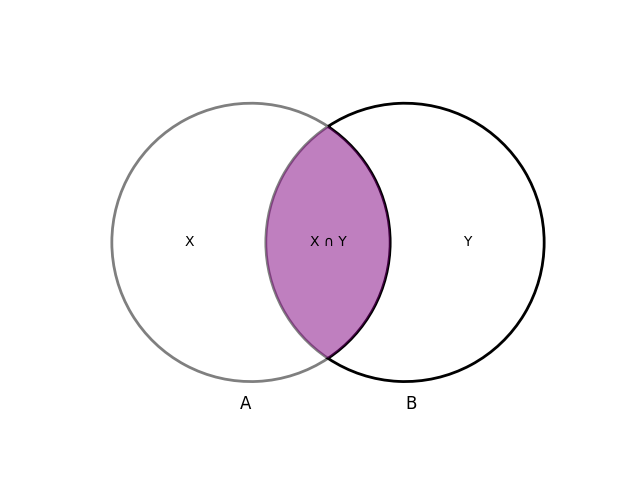

In [29]:
display.Image('inner.png', width = 500)

In [30]:
inner_join = HC20d.merge(HC22d, how = 'inner', on = ['tract_split'])
inner_join[inner_join['Community_Name_x'] == 'Westwood']

,tract_split,Year_x,City_x,LACity_x,Community_Name_x,totSheltPeople_x,totPeople_x,Year_y,City_y,LACity_y,Community_Name_y,totSheltPeople_y,totPeople_y
1422,265100a,2020,Los Angeles,1,Westwood,0,1.749,2022,Los Angeles,1,Westwood,0,2.459
1423,265100b,2020,Los Angeles,1,Westwood,0,1.749,2022,Los Angeles,1,Westwood,0,0.000
1424,265201,2020,Los Angeles,1,Westwood,0,1.000,2022,Los Angeles,1,Westwood,0,4.000
1425,265202,2020,Los Angeles,1,Westwood,0,46.703,2022,Los Angeles,1,Westwood,0,37.422
1426,265301,2020,Los Angeles,1,Westwood,0,5.000,2022,Los Angeles,1,Westwood,0,3.473
1427,265303,2020,Los Angeles,1,Westwood,0,0.000,2022,Los Angeles,1,Westwood,0,9.042
1428,265304,2020,Los Angeles,1,Westwood,0,1.000,2022,Los Angeles,1,Westwood,0,1.473
1429,265305,2020,Los Angeles,1,Westwood,0,30.997,2022,Los Angeles,1,Westwood,0,11.149
1432,265420,2020,Los Angeles,1,Westwood,0,7.599,2022,Los Angeles,1,Westwood,0,6.081
1433,265510a,2020,Los Angeles,1,Westwood,0,5.000,2022,Los Angeles,1,Westwood,0,10.142


## Left Join

- A left join uses keys from one data set to pull in values from another. 

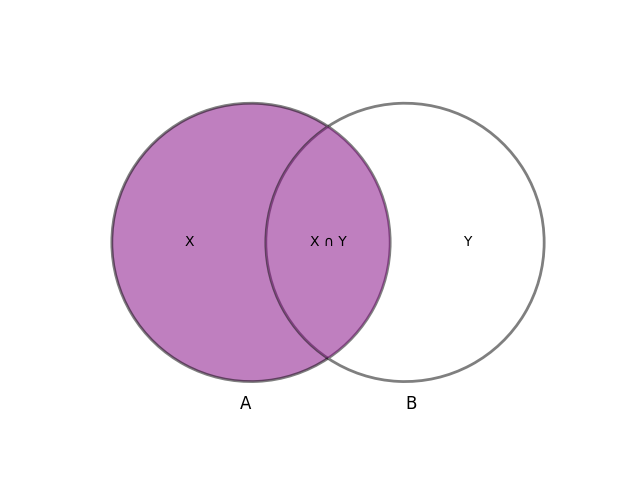

In [31]:
display.Image('left.png', width = 500)

In [32]:
Fort_1K_20 = pd.read_csv('Fortune_1000_2020.csv')
Fort_1K_22 = pd.read_csv('Fortune_1000_2022.csv')
Fort_1K_20.columns
Fort_1K_20[0:10]

,Rank,Name,Number Of Employees,Change In Rank,Industry,Company Description,Revenues_millions,Revenue_Change,Profits_millions,Profit_Change,Assets\n($millions),Market Value\nAs of 3/31/20 ($m)
0,1,Walmart,2200000,-,Retail Company,Walmart Inc. Is An American Multinational Reta...,"$523,964",1.90%,"$14,881.00",123.10%,"$236,495","$321,803"
1,2,Amazon.com,798000,3,E-commerce Company,"Amazon.com, Inc. Is An American Multinational ...","$280,522",20.50%,"$11,588.00",15.00%,"$225,248","$970,680"
2,3,Exxon Mobil,74900,-1,Corporation,"Exxon Mobil Corp. engages in the exploration, ...","$264,938",-8.70%,"$14,340.00",-31.20%,"$362,597","$160,696"
3,4,Apple,137000,-1,Technology Company,Apple Inc. Is An American Multinational Techno...,"$260,174",-2.00%,"$55,256.00",-7.20%,"$338,516","$1,112,641"
4,5,Cvs Health,290000,3,Healthcare Company,Cvs Health Is An American Healthcare Company T...,"$256,776",32.00%,"$6,634.00",-,"$222,449","$77,376"
5,6,Berkshire Hathaway,391500,-2,Multinational Conglomerate Company,Berkshire Hathaway Is An American Multinationa...,"$254,616",2.70%,"$81,417.00",1924.80%,"$817,729","$442,897"
6,7,Unitedhealth Group,325000,-1,Managed Care Company,Unitedhealth Group Incorporated Is An American...,"$242,155",7.00%,"$13,839.00",15.50%,"$173,889","$236,555"
7,8,Mckesson,70000,-1,Health Care Company,Mckesson Corporation Is An American Company Di...,"$214,319",2.90%,$34.00,-49.30%,"$59,672","$21,845"
8,9,At&t,247800,-,Telecommunications Company,At&t Inc. Is An American Multinational Conglom...,"$181,193",6.10%,"$13,903.00",-28.20%,"$551,669","$209,388"
9,10,Amerisourcebergen,21500,-,Wholesale Company,Amerisourcebergen Corporation Is An American D...,"$179,589",6.90%,$855.40,-48.40%,"$39,172","$18,221"


In [33]:
#Fort_1K_22.columns
Fort_1K_22.at[1, 'company'] = 'Amazon.com'
Fort_1K_22.at[3, 'company'] = 'Cvs Health'
Fort_1K_22.at[4, 'company'] = 'Unitedhealth Group'
Fort_1K_22[0:10]

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap
0,Walmart,1,0.0,572754.0,13673.0,2300000.0,Retailing,Bentonville,AR,no,no,no,yes,1.0,C. Douglas McMillon,https://www.stock.walmart.com,WMT,352037
1,Amazon.com,2,0.0,469822.0,33364.0,1608000.0,Retailing,Seattle,WA,no,no,no,yes,2.0,Andrew R. Jassy,www.amazon.com,AMZN,1202717
2,Apple,3,0.0,365817.0,94680.0,154000.0,Technology,Cupertino,CA,no,no,no,yes,3.0,Timothy D. Cook,www.apple.com,AAPL,2443962
3,Cvs Health,4,0.0,292111.0,7910.0,258000.0,Health Care,Woonsocket,RI,no,no,yes,yes,4.0,Karen Lynch,https://www.cvshealth.com,CVS,125204
4,Unitedhealth Group,5,0.0,287597.0,17285.0,350000.0,Health Care,Minnetonka,MN,no,no,no,yes,5.0,Andrew P. Witty,www.unitedhealthgroup.com,UNH,500468
5,Exxon Mobil,6,4.0,285640.0,23040.0,63000.0,Energy,Irving,TX,no,no,no,yes,10.0,Darren W. Woods,www.exxonmobil.com,XOM,371841
6,Berkshire Hathaway,7,-1.0,276094.0,89795.0,372000.0,Financials,Omaha,NE,no,no,no,yes,6.0,Warren E. Buffett,www.berkshirehathaway.com,BRKA,625468
7,Alphabet,8,1.0,257637.0,76033.0,156500.0,Technology,Mountain View,CA,no,no,no,yes,9.0,Sundar Pichai,https://www.abc.xyz,GOOGL,1309359
8,McKesson,9,-2.0,238228.0,-4539.0,67500.0,Health Care,Irving,TX,no,no,no,no,7.0,Brian S. Tyler,www.mckesson.com,MCK,47377
9,AmerisourceBergen,10,-2.0,213988.8,1539.9,40000.0,Health Care,Conshohocken,PA,no,no,no,yes,8.0,Steven H. Collis,www.amerisourcebergen.com,ABC,29972


In [34]:
Fort_1K_22.rename(columns={'company': 'Name', 
                           'rank' : 'Rank', 
                           'profit' : 'Profits_millions'}, 
                  inplace=True)

leftX = Fort_1K_20.merge(Fort_1K_22, how = 'left', 
                         on = 'Name')
leftX[['Name', 'Rank_x', 'Rank_y']][0:10]

,Name,Rank_x,Rank_y
0,Walmart,1,1.0
1,Amazon.com,2,2.0
2,Exxon Mobil,3,6.0
3,Apple,4,3.0
4,Cvs Health,5,4.0
5,Berkshire Hathaway,6,7.0
6,Unitedhealth Group,7,5.0
7,Mckesson,8,NaN
8,At&t,9,NaN
9,Amerisourcebergen,10,NaN


## Outer Join

- An outer join combines all records across both data sets.

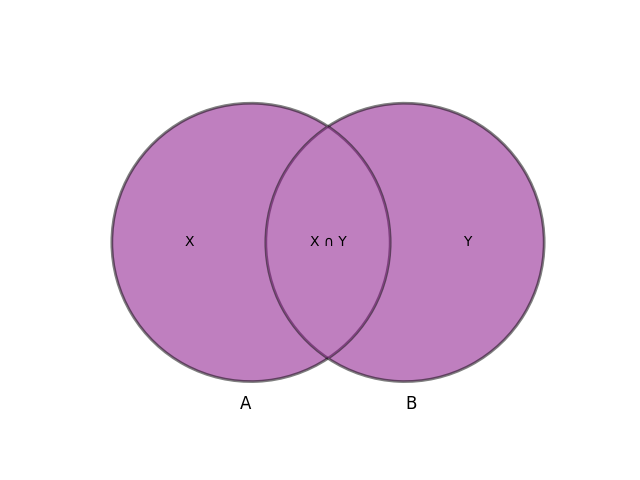

In [35]:
display.Image('outer.png', width = 500)

In [36]:
outerX = Fort_1K_20.merge(Fort_1K_22, how = 'outer', 
                          on = 'Name').sort_values(by='Rank_y')
outerX[['Name', 'Rank_x', 'Rank_y']][0:30]

,Name,Rank_x,Rank_y
0,Walmart,1.0,1.0
1,Amazon.com,2.0,2.0
3,Apple,4.0,3.0
4,Cvs Health,5.0,4.0
6,Unitedhealth Group,7.0,5.0
2,Exxon Mobil,3.0,6.0
5,Berkshire Hathaway,6.0,7.0
10,Alphabet,11.0,8.0
1000,McKesson,NaN,9.0
1001,AmerisourceBergen,NaN,10.0


<h1> Statistics 21 <br/> Have a good night! </h1>

<script>
    setBackgroundImage('Window1.jpg', 'black');
</script>